#Projeto 2 - Identificação de distribuições
>Análise da amostra de dados de jogos da NFL. Frequência de resultados em jogos.

<i>
##Objetivo
O objetivo deste projeto é identificar quais distribuições (funções de densidade de probabilidade - no caso contínuo, ou funções de probabilidade - no caso discreto) descrevem bem as variáveis quantitativas extraídas de datasets.
O resultado final esperado é um relatório que identifique, com bons argumentos, modelos probabilísticos para duas variáveis quantitativas de um ou mais datasets.
##O que deve ser feito
Você precisa escolher duas variáveis quantitativas em datasets públicos de sua escolha. As duas variáveis podem vir do mesmo dataset.
Limpe e prepare os dados para processamento (tratando valores NaN, N/A, por exemplo). Fique atento ao dicionário de dados (se houver) para identificar quais colunas de fato são quantitativas e eventualmente remover valores inválidos.
A seguir, estude as variáveis escolhidas e procure identificar uma função adequada que descreva sua probabilidade de ocorrência.<i>

In [480]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
from numpy import linspace
from ipy_table import *
dados = pd.read_csv("weather_20131231.csv")

###O Data-Set
>O dataset que coletei para análise contêm dados da National Football League (NFL) a Liga de futebol americano jogada nos Estados Unidos. Além de variáveis como o Clima, velocidade do vento, temperatura, o dataset conta com os resultados de jogos. Os dados dísponíveis no DS são de jogos desde 1960 até 2013.

###A Análise
> Dada uma grande variação nos componentes dos times em um intervalo de tempo maior que 50 anos, decidi analisar como se diferencia a forma com o que o time da casa (Home) e o time visitante (Away) marcam. Se existe algum tipo de função que permita concluir que realmente estar jogando "em casa" ou "fora de casa" pode causar alguma diferença visivel em resultados no passar dos anos.



##Histograma dos dados do time da casa (Home):

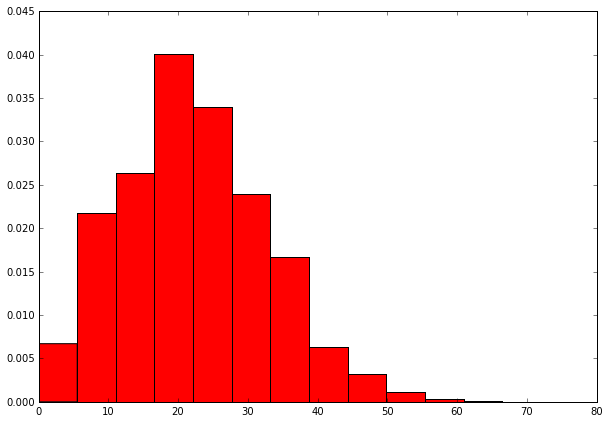

In [481]:
At = linspace(0, 72,720)
Hm = dados.home_score.mean()
Hv = dados.home_score.var()
fig = plt.figure(figsize=(10,7))
plt.hist(x=dados.home_score, bins=linspace(0,dados.home_score.max(),dados.home_score.max()/5), normed=True,color="red")
plt.show()

##Possíveis funções:
Observando a projeção dos dados pude estimar algumas funções que poderiam descrever o comportamento dos dados.
Essas funções possuem descrições de suas variáveis de seus comportamentos e aplicabilidade nos links indicados:
###<font color=Red>Dados Home<font>
Resultados de jogos obtidos pelo time visitante.
###Normal
https://en.wikipedia.org/wiki/Normal_distribution

PDF:
$f(x \; | \; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$

$\mu$ = Média

$\sigma$ = DesvPad

CDF:
$\Phi(x)\; = \;\frac{1}{\sqrt{2\pi}} \int_{-\infty}^x e^{-t^2/2} \, dt$
###<font color=DarkOrange>Chi<font>
https://en.wikipedia.org/wiki/Chi_distribution

$Y = \sqrt{\sum_{i=1}^k \left(\frac{X_i-\mu_i}{\sigma_i}\right)^2}$

PDF:
$f(x;k) = \frac{2^{1-\frac{k}{2}}x^{k-1}e^{-\frac{x^2}{2}}}{\Gamma(\frac{k}{2})}$

CDF:
$F(x;k)=P(k/2,x^2/2)\,$

###<font color=Yellow>Cosine<font>
https://en.wikipedia.org/wiki/Raised_cosine_distribution

PDF:
$f(x;\mu,s)=\frac{1}{2s} \left[1+\cos\left(\frac{x\!-\!\mu}{s}\,\pi\right)\right]\,$

CDF:
$\frac{1}{2}\left[1\!+\!\frac{x\!-\!\mu}{s}
\!+\!\frac{1}{\pi}\sin\left(\frac{x\!-\!\mu}{s}\,\pi\right)\right]$
###<font color=Green>JohnsonSB<font>
http://www.mathwave.com/articles/johnson_sb_distribution.html

PDF:
$\frac{\delta}{\lambda\sqrt{2\pi}}\frac{1}{\sqrt{1 + (\frac{x-\xi}{\lambda})^{2}}}e^{-\frac{1}{2}(\gamma+\delta \sinh^{-1}(\frac{x-\xi}{\lambda}))^{2}}$

CDF:
$\Phi (\gamma + \delta \sinh^{-1}(\frac{x-\xi}{\lambda}))$
##Compatibilidade:
Para melhorar a compatibilidade das funções com os dados utilizei a função <b>.fit()</b> que quando recebe como argumento o nome do DataSet entrega valores dos argumentos para as funções que utilizaram a função <b>.fit()</b>. Por exemplo, a função <b><i>norm</i>.fit()</b> devolve valores associados a função normal, mais especificamente a média e o desvio padrão da função dada.

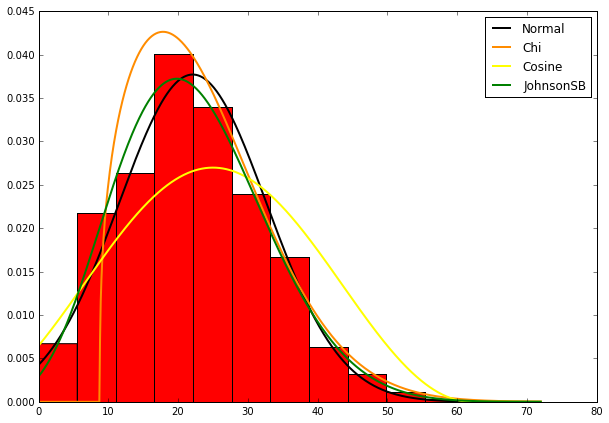

In [482]:
chi_fit_df, chi_fit_loc, chi_fit_scale = stats.chi.fit(dados.home_score)
cosine_fit_loc, cosine_fit_scale = stats.cosine.fit(dados.home_score)
johnsonsb_fit_a, johnsonsb_fit_b,johnsonsb_fit_loc, johnsonsb_fit_scale = stats.johnsonsb.fit(dados.home_score)
#vonmises_fit_kappa, vonmises_fit_loc, vonmises_fit_scale = stats.vonmises.fit(dados.home_score)
#lognorm_fit_s, lognorm_fit_scale, lognorm_fit_loc = stats.lognorm.fit(dados.home_score)

fig = plt.figure(figsize=(10,7))

plt.plot(At, stats.norm.pdf(At, loc=Hm, scale=Hv**(1/2)), color='black',label="Normal", lw=2)
plt.plot(At, stats.chi.pdf(At, df=chi_fit_df, loc=chi_fit_loc, scale=chi_fit_scale), color='DarkOrange',label="Chi",lw=2)
plt.plot(At, stats.cosine.pdf(At, loc=cosine_fit_loc, scale=cosine_fit_scale), color='yellow',label="Cosine",lw=2)
plt.plot(At, stats.johnsonsb.pdf(At,a=johnsonsb_fit_a, b=johnsonsb_fit_b, loc=johnsonsb_fit_loc, scale=johnsonsb_fit_scale), color='green',label="JohnsonSB",lw=2)
#plt.plot(At, stats.vonmises.pdf(At, kappa=vonmises_fit_kappa, loc=vonmises_fit_loc, scale=vonmises_fit_scale), color='red')
#plt.plot(At, stats.lognorm.pdf(At, s=lognorm_fit_s, loc=lognorm_fit_loc, scale=lognorm_fit_scale), color='pink')

plt.hist(x=dados.home_score, bins=linspace(0,dados.home_score.max(),dados.home_score.max()/5), normed=True,color="red")
plt.legend()
plt.show()

##Dados ordenados e quantis teóricos (QQplot):

A seguir, o calculo da frequência relativa acumulada com os dados vindos dos arquivos será plotado juntamente aos valores gerados advindos dos quantis teóricos para as distribuições dispostas no gráfico anterior. Dessa forma o gráfico indicará o ajuste das distribuições com os quantís teóricos da base do DataSet. Essa análise indica o quão próximo dos dados a distribuição está.

O link a seguir explica os conceitos associados ao plot dos quantis teóricos e dos dados ordenados.
https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot

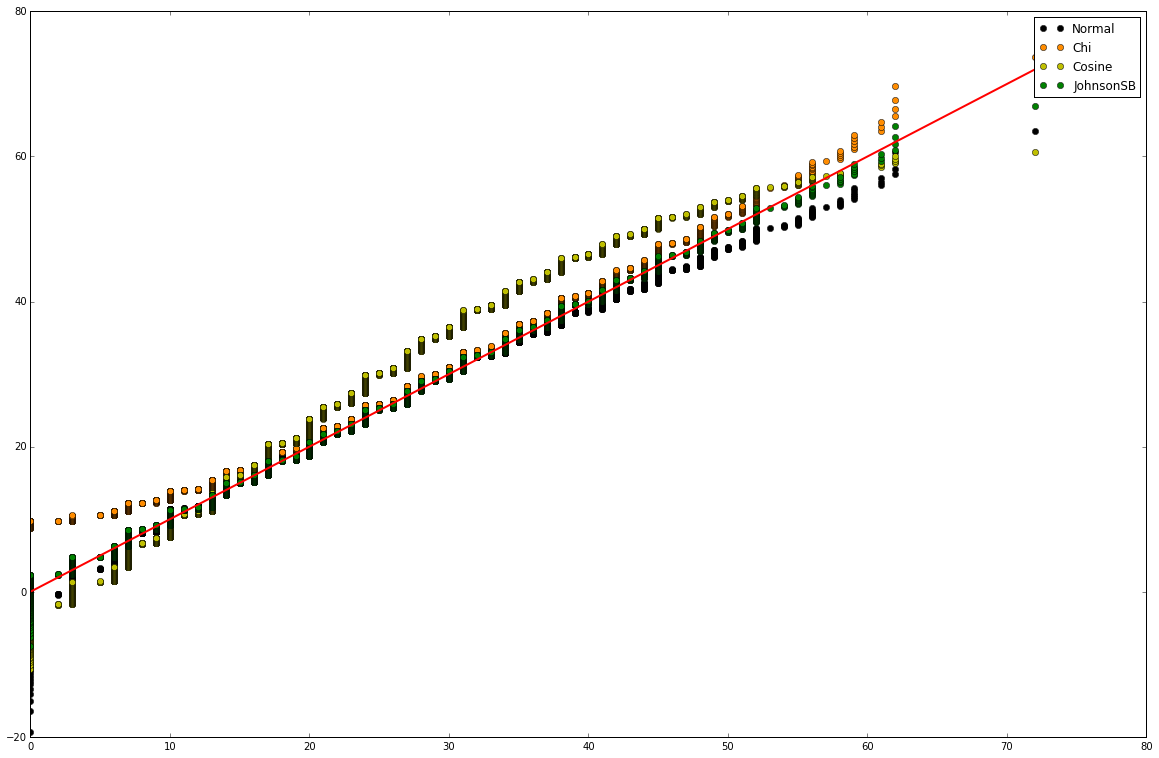

In [483]:
 # quantis teóricos    
fig = plt.figure(figsize=(20,13))

fra = []
Hn=len(dados.home_score)
for i in range(Hn):
    x =((i + 0.5) / Hn)
    if x < 0:
        x=0
    fra.append(x)

q_norm = stats.norm.ppf(fra,loc=Hm, scale= Hv**(1/2))
q_chi = stats.chi.ppf(fra,df=chi_fit_df, loc=chi_fit_loc, scale=chi_fit_scale)
q_cosine = stats.cosine.ppf(fra,loc=cosine_fit_loc, scale=cosine_fit_scale)
q_johnsonsb = stats.johnsonsb.ppf(fra, a=johnsonsb_fit_a,b=johnsonsb_fit_b, loc=johnsonsb_fit_loc ,scale=johnsonsb_fit_scale)

Hx=dados.home_score.sort(inplace=False)

plt.plot(Hx, q_norm, 'o', color='black',label="Normal")
plt.plot(Hx, q_chi, 'o',color='DarkOrange',label="Chi")
plt.plot(Hx, q_cosine, 'yo',label="Cosine")
plt.plot(Hx, q_johnsonsb, 'go',label="JohnsonSB")
plt.plot((min(dados.home_score), max(dados.home_score)), (min(dados.home_score), max(dados.home_score)), '-',color='red', lw=2)
plt.legend()
plt.show()

##Testes de aderência:
Os testes de aderência são parte importante do processo já que visam tornar as informações visuais do gráfico <i>QQ-Plot</i> em dados numéricos. Essa análise pode gerar informações sobre qual a distribuição que melhor se adequa a base de dados.
###Métodos que utilizam diferença entre quantis:
><b>Erro quadrático:</b> O erro quadrático é a soma das diferenças entre o valor do quantil teórico da distribuição e o valor encontrado nos dados.

In [484]:
erro_quadratico_normal = sum((dados.home_score - q_norm)**2)
erro_quadratico_chi = sum((dados.home_score - q_chi)**2)
erro_quadratico_cosine = sum((dados.home_score - q_cosine)**2)
erro_quadratico_johnsonsb = sum((dados.home_score - q_johnsonsb)**2)

print("Erro quadrático da normal :{:4.3f}".format(erro_quadratico_normal))
print("Erro quadrático da chi :{:4.3f}".format(erro_quadratico_chi))
print("Erro quadrático da cosine :{:4.3f}".format(erro_quadratico_cosine))
print("Erro quadrático da johnsonsb :{:4.3f}".format(erro_quadratico_johnsonsb))

Erro quadrático da normal :2371550.231
Erro quadrático da chi :2182019.569
Erro quadrático da cosine :3184026.679
Erro quadrático da johnsonsb :2364565.674


Baseado na análise do erro quadrático, a distribuição <b>Chi</b> possui um erro menor do que as outras distribuições. Porém, este valor ainda é muito próximo de valores das distribuições <b>Normal</b> e <b>Johnson SB</b>.

><b>Erro quadrático médio</b>:Fazendo a média do erro quadrático. https://en.wikipedia.org/wiki/Mean_squared_error

In [485]:
eqm_norm = erro_quadratico_normal/len(dados.home_score)
eqm_chi = erro_quadratico_chi/len(dados.home_score)
eqm_cosine = erro_quadratico_cosine/len(dados.home_score)
eqm_johnsonsb = erro_quadratico_johnsonsb/len(dados.home_score)

print("Erro quadratico médio da normal :", eqm_norm)
print("Erro quadratico médio da chi :", eqm_chi)
print("Erro quadratico médio da consine :", eqm_cosine)
print("Erro quadratico médio da johnsonsb :", eqm_johnsonsb)

Erro quadratico médio da normal : 211.896911276
Erro quadratico médio da chi : 194.962434674
Erro quadratico médio da consine : 284.491304408
Erro quadratico médio da johnsonsb : 211.27284438


Baseado na análise dos erros quadráticos medios, a distribuição <b>Chi</b> possui um erro menor do que as outras distribuições. Porém, este valor ainda é muito próximo de valores das distribuições <b>Normal</b> e <b>Johnson SB</b>.

><b>Soma de diferenças:</b> Teste de aderência baseado no módulo da soma das diferenças. https://en.wikipedia.org/wiki/Checksum

In [486]:
soma_diferenças_norm = sum(abs(dados.home_score - q_norm))
soma_diferenças_chi = sum(abs(dados.home_score - q_chi))
soma_diferenças_cosine = sum(abs(dados.home_score - q_cosine))
soma_diferenças_johnsonsb = sum(abs(dados.home_score - q_johnsonsb))

print("Soma de diferenças da normal :", soma_diferenças_norm)
print("Soma de diferenças da chi :", soma_diferenças_chi)
print("Soma de diferenças da cosine :", soma_diferenças_cosine)
print("Soma de diferenças da johnsonsb :", soma_diferenças_johnsonsb)

Soma de diferenças da normal : 129135.181786
Soma de diferenças da chi : 123705.394888
Soma de diferenças da cosine : 152109.743858
Soma de diferenças da johnsonsb : 129046.136837


Baseado na análise dos erros associados as somas das diferenças, a distribuição <b>Chi</b> possui um erro menor do que as outras distribuições. Porém, este valor ainda é muito próximo de valores das distribuições <b>Normal</b> e <b>Johnson SB</b>.

###Métodos que utilizam a cumulativa:
>Utilizaremos a diferença entre a função cumulativa de probabilidade teórica e a cumulativa observada nos dados para prever o erro associados as distribuições utilizadas anteriormente. https://en.wikipedia.org/wiki/Cumulative_distribution_function

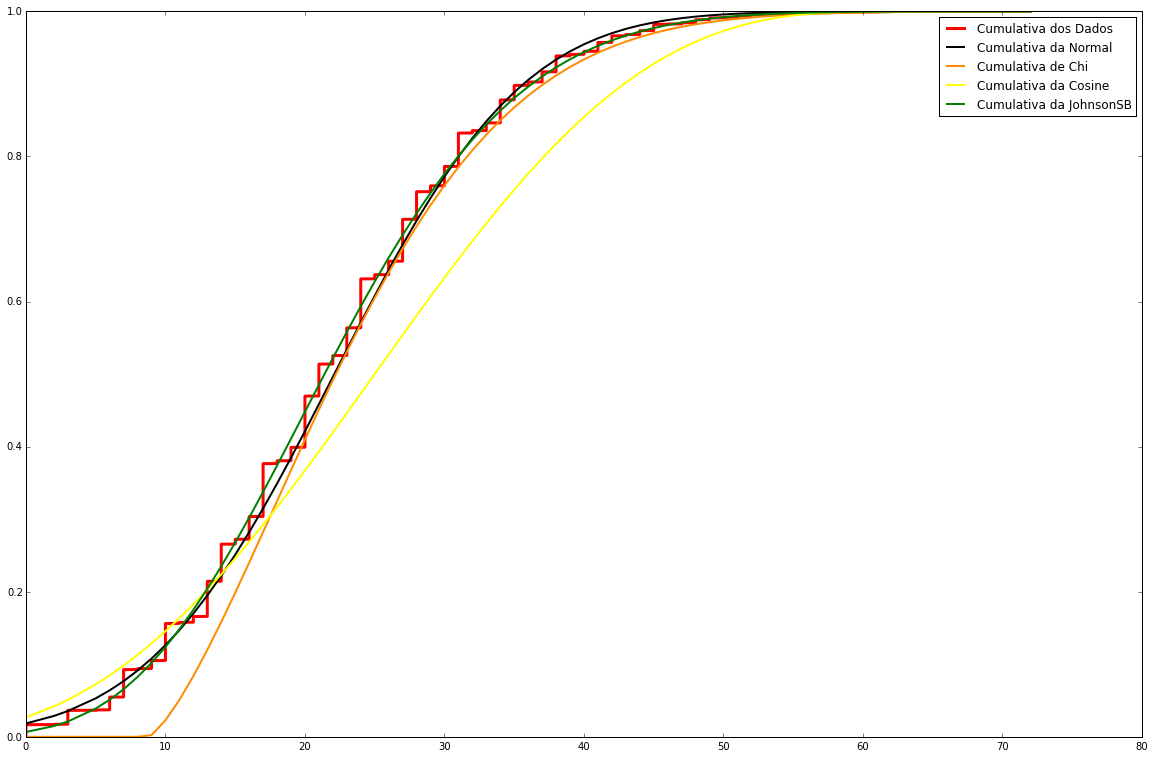

In [487]:
cdf_norm = stats.norm.cdf(dados.home_score,scale = Hv**(1/2), loc= Hm)#FDA
cdf_chi = stats.chi.cdf(dados.home_score,df=chi_fit_df, loc=chi_fit_loc, scale=chi_fit_scale)
cdf_cosine = stats.cosine.cdf(dados.home_score,loc=cosine_fit_loc, scale=cosine_fit_scale)
cdf_johnsonsb = stats.johnsonsb.cdf(dados.home_score, a=johnsonsb_fit_a,b=johnsonsb_fit_b, loc=johnsonsb_fit_loc ,scale=johnsonsb_fit_scale)

cdf_norm = pd.Series(data=cdf_norm)
cdf_norm = cdf_norm.sort(inplace=False)
cdf_chi = pd.Series(data=cdf_chi)
cdf_chi = cdf_chi.sort(inplace=False)
cdf_cosine = pd.Series(data=cdf_cosine)
cdf_cosine = cdf_cosine.sort(inplace=False)
cdf_johnsonsb = pd.Series(data=cdf_johnsonsb)
cdf_johnsonsb = cdf_johnsonsb.sort(inplace=False)

fig = plt.figure(figsize=(20,13))

plt.plot(Hx, fra, '-',lw=3, color='red',label="Cumulativa dos Dados")
plt.plot(Hx, cdf_norm,'-', lw=2,color='black',label="Cumulativa da Normal")
plt.plot(Hx, cdf_chi,'-', lw=2,color='DarkOrange',label="Cumulativa de Chi")
plt.plot(Hx, cdf_cosine,'-', lw=2,color='yellow',label="Cumulativa da Cosine")
plt.plot(Hx, cdf_johnsonsb,'-', lw=2,color='green',label="Cumulativa da JohnsonSB")
plt.legend()
plt.show()

><b>Erro quadrático nas funções cumulativas de probabilidade:</b> 

In [488]:
erro_quad_cdf_norm = sum((fra - cdf_norm)**2)
erro_quad_cdf_chi = sum((fra - cdf_chi)**2)
erro_quad_cdf_cosine = sum((fra - cdf_cosine)**2)
erro_quad_cdf_johnsonsb = sum((fra - cdf_johnsonsb)**2)

print("Erro quadrático da CDF da Normal versus FRA : ", erro_quad_cdf_norm)
print("Erro quadrático da CDF da Chi versus FRA : ", erro_quad_cdf_chi)
print("Erro quadrático da CDF da Cosine versus FRA : ", erro_quad_cdf_cosine)
print("Erro quadrático da CDF da JohnsonSB versus FRA : ", erro_quad_cdf_johnsonsb)

Erro quadrático da CDF da Normal versus FRA :  4.66665223923
Erro quadrático da CDF da Chi versus FRA :  27.5669951803
Erro quadrático da CDF da Cosine versus FRA :  97.4663959868
Erro quadrático da CDF da JohnsonSB versus FRA :  2.80717411746


Baseado na análise dos erros quadráticos associados a cumulativa, a distribuição <b>JohnsonSB</b> possui um erro menor do que as outras distribuições. Dessa forma,<b>oferece o melhor ajuste para estes parâmetros testados.</b>

><b>Diferenças absolutas:</b> 

In [489]:
# Diferenças absolutas
soma_difs_cdf_norm = sum( abs(fra - cdf_norm))
soma_difs_cdf_chi = sum( abs(fra - cdf_chi))
soma_difs_cdf_cosine = sum( abs(fra - cdf_cosine))
soma_difs_cdf_johnsonsb = sum( abs(fra - cdf_johnsonsb))

print("Erro da soma do módulo das diferenças da normal versus F.R.A: {0} \nErro da soma do módulo das diferenças da chi versus F.R.A: {1} \nErro da soma do módulo das diferenças da cosine versus F.R.A: {2} \nErro da soma do módulo das diferenças da johnsonsb versus F.R.A: {3}".format(soma_difs_cdf_norm, soma_difs_cdf_chi,soma_difs_cdf_cosine,soma_difs_cdf_johnsonsb))

Erro da soma do módulo das diferenças da normal versus F.R.A: 175.89519891669897 
Erro da soma do módulo das diferenças da chi versus F.R.A: 433.8323663611964 
Erro da soma do módulo das diferenças da cosine versus F.R.A: 875.7496772558212 
Erro da soma do módulo das diferenças da johnsonsb versus F.R.A: 137.64911751933076


Baseado na análise dos erros associados as diferenças absolutas, a distribuição <b>JohnsonSB</b> possui um erro menor do que as outras distribuições. Dessa forma,<b>oferece o melhor ajuste para estes parâmetros testados.</b>



><b><a href=https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test>"Kolmogorov-Smirnov goodness-of-fit test":<a/></b> Teste K-S Basea-se na a máxima discrepância entre a <a href=https://en.wikipedia.org/wiki/Cumulative_distribution_function>frequência relativa acumulada</a> encontrada nos dados e a cumulativa da distribuição teórica

In [490]:
ks_aderencia_norm = max(abs(fra - cdf_norm))
ks_aderencia_chi = max(abs(fra - cdf_chi))
ks_aderencia_cosine = max(abs(fra - cdf_cosine))
ks_aderencia_johnsonsb = max(abs(fra - cdf_johnsonsb))


print(" Teste K-S para a normal : " + str(ks_aderencia_norm) + "\n Teste K-S para a chi : "+str(ks_aderencia_chi)+"\n Teste K-S para a cosine : "+str(ks_aderencia_cosine) +"\n Teste K-S para a johnsonsb : "+str(ks_aderencia_johnsonsb))

 Teste K-S para a normal : 0.0617541528957
 Teste K-S para a chi : 0.133364995098
 Teste K-S para a cosine : 0.173769790635
 Teste K-S para a johnsonsb : 0.0489868654941


In [491]:
Home = [['Distrib.','ErroQM','Soma das Dif.','ErroQM-CDF','Difer. Abs.','K-S'],['Normal',eqm_norm,soma_diferenças_norm,erro_quad_cdf_norm,soma_difs_cdf_norm,ks_aderencia_norm],['Chi',eqm_chi,soma_diferenças_chi,erro_quad_cdf_chi,soma_difs_cdf_chi,ks_aderencia_chi],['Cosine',eqm_cosine,soma_diferenças_cosine,erro_quad_cdf_cosine,soma_difs_cdf_cosine,ks_aderencia_cosine],['JohnsonSB',eqm_johnsonsb,soma_diferenças_johnsonsb,erro_quad_cdf_johnsonsb,soma_difs_cdf_johnsonsb,ks_aderencia_johnsonsb]]
make_table(Home)
apply_theme('basic')
set_global_style(float_format='%0.3E')
set_row_style(4,color='Red')


Distrib.,ErroQM,Soma das Dif.,ErroQM-CDF,Difer. Abs.,K-S
Normal,211.896911276,129135.181786,4.66665223923,175.895198917,0.0617541528957
Chi,194.962434674,123705.394888,27.5669951803,433.832366361,0.133364995098
Cosine,284.491304408,152109.743858,97.4663959868,875.749677256,0.173769790635
JohnsonSB,211.27284438,129046.136837,2.80717411746,137.649117519,0.0489868654941


##Histograma dos dados do time visitante (Away):
><i>A forma com que será analisada a segunda iteração com os dados do time visitante(Away) é análoga a forma com que foi realizada a análise do time da casa(Home).Portanto, as explicações serão as mesmas para as análises de erros e associações de dados e distribuições.</i>

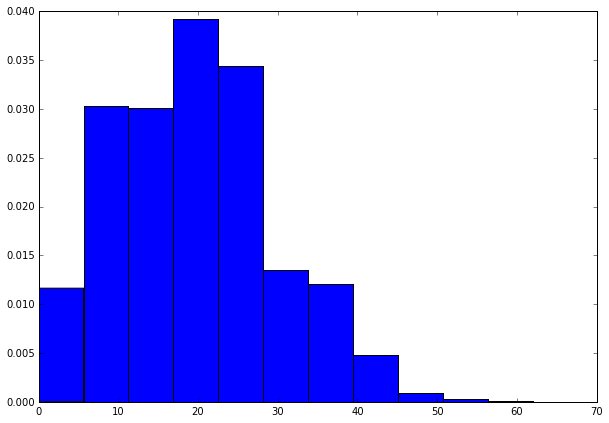

In [492]:
At = linspace(0, 72,720)
Am = dados.away_score.mean()
Av = dados.away_score.var()
fig = plt.figure(figsize=(10,7))
plt.hist(x=dados.away_score, bins=linspace(0,dados.away_score.max(),dados.away_score.max()/5), normed=True,color="blue")
plt.show()

##Possíveis funções:
Observando a projeção dos dados pude estimar algumas funções que poderiam descrever o comportamento dos dados.
Essas funções possuem descrições de suas variáveis de seus comportamentos e aplicabilidade nos links indicados:
###<font color=Blue>Dados Away<font>
Resultados de jogos obtidos pelo time visitante.
###Normal
https://en.wikipedia.org/wiki/Normal_distribution

PDF:
$f(x \; | \; \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$

$\mu$ = Média

$\sigma$ = DesvPad

CDF:
$\Phi(x)\; = \;\frac{1}{\sqrt{2\pi}} \int_{-\infty}^x e^{-t^2/2} \, dt$
###<font color=DarkOrange>Chi<font>
https://en.wikipedia.org/wiki/Chi_distribution

$Y = \sqrt{\sum_{i=1}^k \left(\frac{X_i-\mu_i}{\sigma_i}\right)^2}$

PDF:
$f(x;k) = \frac{2^{1-\frac{k}{2}}x^{k-1}e^{-\frac{x^2}{2}}}{\Gamma(\frac{k}{2})}$

CDF:
$F(x;k)=P(k/2,x^2/2)\,$

###<font color=Yellow>Cosine<font>
https://en.wikipedia.org/wiki/Raised_cosine_distribution

PDF:
$f(x;\mu,s)=\frac{1}{2s} \left[1+\cos\left(\frac{x\!-\!\mu}{s}\,\pi\right)\right]\,$

CDF:
$\frac{1}{2}\left[1\!+\!\frac{x\!-\!\mu}{s}
\!+\!\frac{1}{\pi}\sin\left(\frac{x\!-\!\mu}{s}\,\pi\right)\right]$
###<font color=Green>JohnsonSB<font>
http://www.mathwave.com/articles/johnson_sb_distribution.html

PDF:
$\frac{\delta}{\lambda\sqrt{2\pi}}\frac{1}{\sqrt{1 + (\frac{x-\xi}{\lambda})^{2}}}e^{-\frac{1}{2}(\gamma+\delta \sinh^{-1}(\frac{x-\xi}{\lambda}))^{2}}$

CDF:
$\Phi (\gamma + \delta \sinh^{-1}(\frac{x-\xi}{\lambda}))$
##Compatibilidade:
Para melhorar a compatibilidade das funções com os dados utilizei a função <b>.fit()</b> que quando recebe como argumento o nome do DataSet entrega valores dos argumentos para as funções que utilizaram a função <b>.fit()</b>. Por exemplo, a função <b><i>norm</i>.fit()</b> devolve valores associados a função normal, mais especificamente a média e o desvio padrão da função dada.

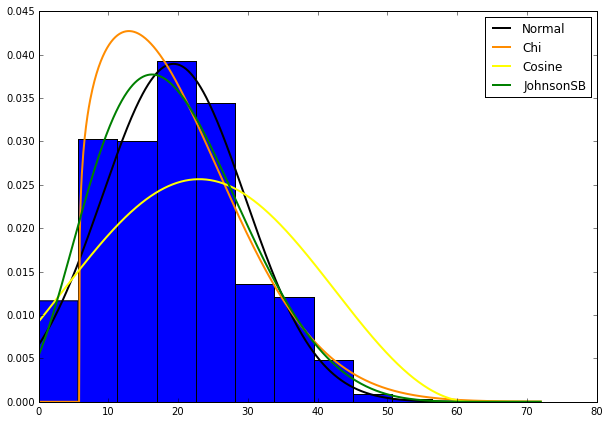

In [493]:
chi_fit_df, chi_fit_loc, chi_fit_scale = stats.chi.fit(dados.away_score)
cosine_fit_loc, cosine_fit_scale = stats.cosine.fit(dados.away_score)
johnsonsb_fit_a, johnsonsb_fit_b,johnsonsb_fit_loc, johnsonsb_fit_scale = stats.johnsonsb.fit(dados.away_score)
vonmises_fit_kappa, vonmises_fit_loc, vonmises_fit_scale = stats.vonmises.fit(dados.away_score)
#lognorm_fit_s, lognorm_fit_scale, lognorm_fit_loc = stats.lognorm.fit(dados.away_score)

fig = plt.figure(figsize=(10,7))

plt.plot(At, stats.norm.pdf(At, loc=Am, scale=Av**(1/2)), color='black',label="Normal", lw=2)
plt.plot(At, stats.chi.pdf(At, df=chi_fit_df, loc=chi_fit_loc, scale=chi_fit_scale), color='DarkOrange',label="Chi",lw=2)
plt.plot(At, stats.cosine.pdf(At, loc=cosine_fit_loc, scale=cosine_fit_scale), color='yellow',label="Cosine",lw=2)
plt.plot(At, stats.johnsonsb.pdf(At,a=johnsonsb_fit_a, b=johnsonsb_fit_b, loc=johnsonsb_fit_loc, scale=johnsonsb_fit_scale), color='green',label="JohnsonSB",lw=2)
#plt.plot(At, stats.vonmises.pdf(At, kappa=vonmises_fit_kappa, loc=vonmises_fit_loc, scale=vonmises_fit_scale), color='red')
#plt.plot(At, stats.lognorm.pdf(At, s=lognorm_fit_s, loc=lognorm_fit_loc, scale=lognorm_fit_scale), color='pink')

plt.hist(x=dados.away_score, bins=linspace(0,dados.away_score.max(),dados.away_score.max()/5), normed=True,color="blue")
plt.legend()
plt.show()

##Dados ordenados e quantis teóricos (QQplot):

A seguir, o calculo da frequência relativa acumulada com os dados vindos dos arquivos será plotado juntamente aos valores gerados advindos dos quantis teóricos para as distribuições dispostas no gráfico anterior. Dessa forma o gráfico indicará o ajuste das distribuições com os quantís teóricos da base do DataSet. Essa análise indica o quão próximo dos dados a distribuição está.

O link a seguir explica os conceitos associados ao plot dos quantis teóricos e dos dados ordenados.
https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot

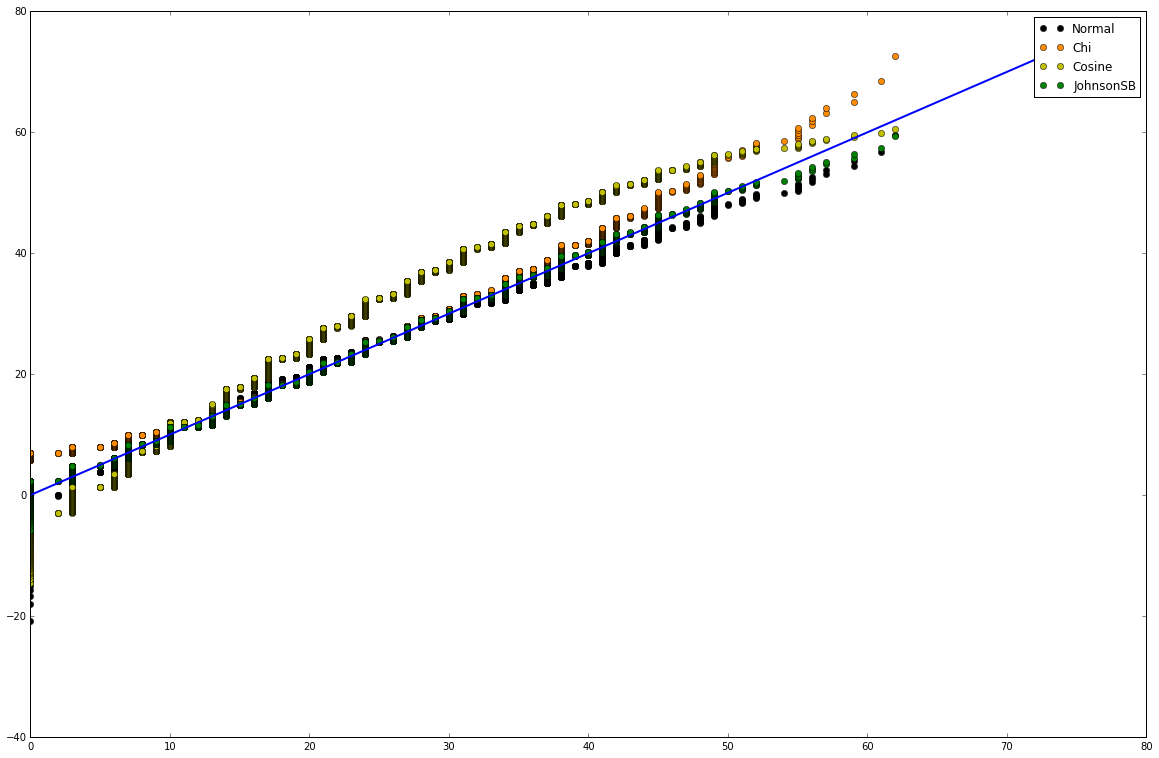

In [494]:
fig = plt.figure(figsize=(20,13))

fra = []
An=len(dados.away_score)
for i in range(An):
    x =((i + 0.5) / An)
    if x < 0:
        x=0
    fra.append(x)

q_norm = stats.norm.ppf(fra,loc=Am, scale= Av**(1/2))
q_chi = stats.chi.ppf(fra,df=chi_fit_df, loc=chi_fit_loc, scale=chi_fit_scale)
q_cosine = stats.cosine.ppf(fra,loc=cosine_fit_loc, scale=cosine_fit_scale)
q_johnsonsb = stats.johnsonsb.ppf(fra, a=johnsonsb_fit_a,b=johnsonsb_fit_b, loc=johnsonsb_fit_loc ,scale=johnsonsb_fit_scale)

Ax=dados.away_score.sort(inplace=False)

plt.plot(Ax, q_norm, 'o', color='black',label="Normal")
plt.plot(Ax, q_chi, 'o',color='DarkOrange',label="Chi")
plt.plot(Ax, q_cosine, 'yo',label="Cosine")
plt.plot(Ax, q_johnsonsb, 'go',label="JohnsonSB")
plt.plot((min(dados.home_score), max(dados.home_score)), (min(dados.home_score), max(dados.home_score)), '-', lw=2)
plt.legend()
plt.show()

##Testes de aderência:
Os testes de aderência são parte importante do processo já que visam tornar as informações visuais do gráfico <i>QQ-Plot</i> em dados numéricos. Essa análise pode gerar informações sobre qual a distribuição que melhor se adequa a base de dados.
###Métodos que utilizam diferença entre quantis:
><b>Erro quadrático:</b> O erro quadrático é a soma das diferenças entre o valor do quantil teórico da distribuição e o valor encontrado nos dados.

In [495]:
erro_quadratico_normal = sum((dados.away_score - q_norm)**2)
erro_quadratico_chi = sum((dados.away_score - q_chi)**2)
erro_quadratico_cosine = sum((dados.away_score - q_cosine)**2)
erro_quadratico_johnsonsb = sum((dados.away_score - q_johnsonsb)**2)

print("Erro quadrático da normal :{:4.3f}\n".format(erro_quadratico_normal))
print("Erro quadrático da chi :{:4.3f}\n".format(erro_quadratico_chi))
print("Erro quadrático da cosine :{:4.3f}\n".format(erro_quadratico_cosine))
print("Erro quadrático da johnsonsb :{:4.3f}\n".format(erro_quadratico_johnsonsb))

Erro quadrático da normal :2255276.212

Erro quadrático da chi :2154884.045

Erro quadrático da cosine :3413218.127

Erro quadrático da johnsonsb :2243753.651



Baseado na análise dos erros associados as somas das diferenças, a distribuição <b>Chi</b> possui um erro menor do que as outras distribuições. Porém, este valor ainda é muito próximo de valores das distribuições <b>Normal</b> e <b>Johnson SB</b>.

><b>Erro quadrático médio</b>:Fazendo a média do erro quadrático. https://en.wikipedia.org/wiki/Mean_squared_error

In [496]:
eqm_norm = erro_quadratico_normal/len(dados.away_score)
eqm_chi = erro_quadratico_chi/len(dados.away_score)
eqm_cosine = erro_quadratico_cosine/len(dados.away_score)
eqm_johnsonsb = erro_quadratico_johnsonsb/len(dados.away_score)

print("Erro quadratico médio da normal :", eqm_norm)
print("Erro quadratico médio da chi :", eqm_chi)
print("Erro quadratico médio da consine :", eqm_cosine)
print("Erro quadratico médio da johnsonsb :", eqm_johnsonsb)

Erro quadratico médio da normal : 201.50788171
Erro quadratico médio da chi : 192.537888258
Erro quadratico médio da consine : 304.969453765
Erro quadratico médio da johnsonsb : 200.478346188


Baseado na análise dos erros quadráticos médios, a distribuição <b>Chi</b> possui um erro menor do que as outras distribuições. Porém, este valor ainda é muito próximo de valores das distribuições <b>Normal</b> e <b>Johnson SB</b>.

><b>Soma de diferenças:</b> Teste de aderência baseado no módulo da soma das diferenças. https://en.wikipedia.org/wiki/Checksum

In [497]:
soma_diferenças_norm = sum(abs(dados.away_score - q_norm))
soma_diferenças_chi = sum(abs(dados.away_score - q_chi))
soma_diferenças_cosine = sum(abs(dados.away_score - q_cosine))
soma_diferenças_johnsonsb = sum(abs(dados.away_score - q_johnsonsb))

print("Soma de diferenças da normal :", soma_diferenças_norm)
print("Soma de diferenças da chi :", soma_diferenças_chi)
print("Soma de diferenças da cosine :", soma_diferenças_cosine)
print("Soma de diferenças da johnsonsb :", soma_diferenças_johnsonsb)

Soma de diferenças da normal : 125785.139342
Soma de diferenças da chi : 122584.460281
Soma de diferenças da cosine : 157387.804145
Soma de diferenças da johnsonsb : 125780.883101


Baseado na análise dos erros associados as somas das diferenças, a distribuição <b>Chi</b> possui um erro menor do que as outras distribuições. Porém, este valor ainda é muito próximo de valores das distribuições <b>Normal</b> e <b>Johnson SB</b>.


###Métodos que utilizam a cumulativa:
>Utilizaremos a diferença entre a função cumulativa de probabilidade teórica e a cumulativa observada nos dados para prever o erro associados as distribuições utilizadas anteriormente. https://en.wikipedia.org/wiki/Cumulative_distribution_function

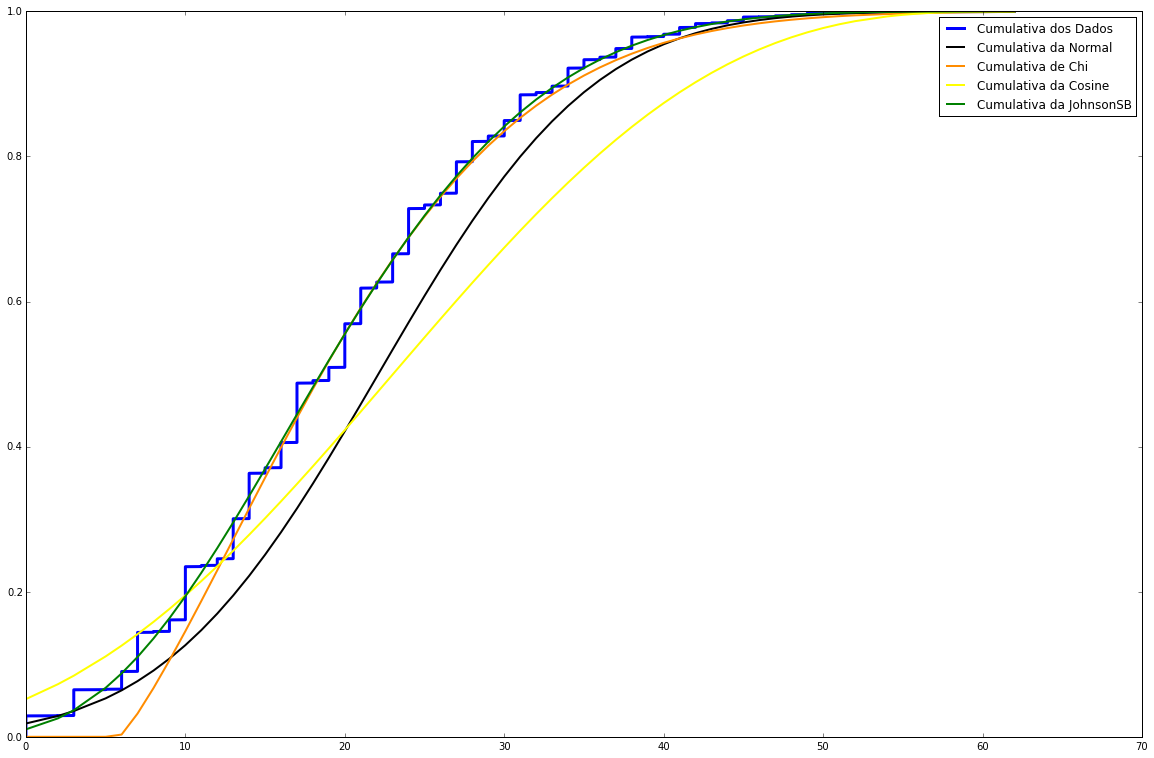

In [498]:
cdf_norm = stats.norm.cdf(dados.away_score,scale = Hv**(1/2), loc= Hm)#FDA
cdf_chi = stats.chi.cdf(dados.away_score,df=chi_fit_df, loc=chi_fit_loc, scale=chi_fit_scale)
cdf_cosine = stats.cosine.cdf(dados.away_score,loc=cosine_fit_loc, scale=cosine_fit_scale)
cdf_johnsonsb = stats.johnsonsb.cdf(dados.away_score, a=johnsonsb_fit_a,b=johnsonsb_fit_b, loc=johnsonsb_fit_loc ,scale=johnsonsb_fit_scale)

cdf_norm = pd.Series(data=cdf_norm)
cdf_norm = cdf_norm.sort(inplace=False)
cdf_chi = pd.Series(data=cdf_chi)
cdf_chi = cdf_chi.sort(inplace=False)
cdf_cosine = pd.Series(data=cdf_cosine)
cdf_cosine = cdf_cosine.sort(inplace=False)
cdf_johnsonsb = pd.Series(data=cdf_johnsonsb)
cdf_johnsonsb = cdf_johnsonsb.sort(inplace=False)

fig = plt.figure(figsize=(20,13))

plt.plot(Ax, fra, '-',lw=3, color='blue',label="Cumulativa dos Dados")
plt.plot(Ax, cdf_norm,'-', lw=2,color='black',label="Cumulativa da Normal")
plt.plot(Ax, cdf_chi,'-', lw=2,color='DarkOrange',label="Cumulativa de Chi")
plt.plot(Ax, cdf_cosine,'-', lw=2,color='yellow',label="Cumulativa da Cosine")
plt.plot(Ax, cdf_johnsonsb,'-', lw=2,color='green',label="Cumulativa da JohnsonSB")
plt.legend()
plt.show()

><b>Erro quadrático nas funções cumulativas de probabilidade:</b> 

In [499]:
# Erro quadrático nas CDFs
erro_quad_cdf_norm = sum((fra - cdf_norm)**2)
erro_quad_cdf_chi = sum((fra - cdf_chi)**2)
erro_quad_cdf_cosine = sum((fra - cdf_cosine)**2)
erro_quad_cdf_johnsonsb = sum((fra - cdf_johnsonsb)**2)

print("Erro quadrático da CDF da Normal versus FRA : ", erro_quad_cdf_norm)
print("Erro quadrático da CDF da Chi versus FRA : ", erro_quad_cdf_chi)
print("Erro quadrático da CDF da Cosine versus FRA : ", erro_quad_cdf_cosine)
print("Erro quadrático da CDF da JohnsonSB versus FRA : ", erro_quad_cdf_johnsonsb)

Erro quadrático da CDF da Normal versus FRA :  97.6589483563
Erro quadrático da CDF da Chi versus FRA :  12.9676056103
Erro quadrático da CDF da Cosine versus FRA :  143.004424552
Erro quadrático da CDF da JohnsonSB versus FRA :  3.36511873015


Baseado na análise dos erros quadráticos associados a cumulativa, a distribuição <b>JohnsonSB</b> possui um erro menor do que as outras distribuições. Dessa forma,<b>oferece o melhor ajuste para estes parâmetros testados.</b>

><b>Diferenças absolutas:</b> 

In [500]:
# Diferenças absolutas
soma_difs_cdf_norm = sum( abs(fra - cdf_norm))
soma_difs_cdf_chi = sum( abs(fra - cdf_chi))
soma_difs_cdf_cosine = sum( abs(fra - cdf_cosine))
soma_difs_cdf_johnsonsb = sum( abs(fra - cdf_johnsonsb))

print("Erro da soma do módulo das diferenças da normal versus F.R.A: {0} \nErro da soma do módulo das diferenças da chi versus F.R.A: {1} \nErro da soma do módulo das diferenças da cosine versus F.R.A: {2} \nErro da soma do módulo das diferenças da johnsonsb versus F.R.A: {3}".format(soma_difs_cdf_norm, soma_difs_cdf_chi,soma_difs_cdf_cosine,soma_difs_cdf_johnsonsb))

Erro da soma do módulo das diferenças da normal versus F.R.A: 924.3716838946348 
Erro da soma do módulo das diferenças da chi versus F.R.A: 273.22116692497065 
Erro da soma do módulo das diferenças da cosine versus F.R.A: 1074.1991831721716 
Erro da soma do módulo das diferenças da johnsonsb versus F.R.A: 151.79010643611872


Baseado na análise dos erros associados as diferenças absolutas, a distribuição <b>JohnsonSB</b> possui um erro menor do que as outras distribuições. Dessa forma,<b>oferece o melhor ajuste para estes parâmetros testados.</b>



><b><a href=https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test>"Kolmogorov-Smirnov goodness-of-fit test":<a/></b> Teste K-S Basea-se na a máxima discrepância entre a <a href=https://en.wikipedia.org/wiki/Cumulative_distribution_function>frequência relativa acumulada</a> encontrada nos dados e a cumulativa da distribuição teórica

In [501]:
# Kolmogorov-Smirnov goodness-of-fit test
ks_aderencia_norm = max(abs(fra - cdf_norm))
ks_aderencia_chi = max(abs(fra - cdf_chi))
ks_aderencia_cosine = max(abs(fra - cdf_cosine))
ks_aderencia_johnsonsb = max(abs(fra - cdf_johnsonsb))


print(" Teste K-S para a normal : " + str(ks_aderencia_norm) + "\n Teste K-S para a chi : "+str(ks_aderencia_chi)+"\n Teste K-S para a cosine : "+str(ks_aderencia_cosine) +"\n Teste K-S para a johnsonsb : "+str(ks_aderencia_johnsonsb))

 Teste K-S para a normal : 0.172726275841
 Teste K-S para a chi : 0.111854959357
 Teste K-S para a cosine : 0.203101301749
 Teste K-S para a johnsonsb : 0.0500568537656


Baseado na análise dos erros associados Kolmogorov-Smornov (K-S), a distribuição <b>JohnsonSB</b> possui um erro menor do que as outras distribuições. Dessa forma,<b>oferece o melhor ajuste para estes parâmetros testados.</b>

In [502]:
Home = [['Distrib.','ErroQM','Soma das Dif.','ErroQM-CDF','Difer. Abs.','K-S'],['Normal',eqm_norm,soma_diferenças_norm,erro_quad_cdf_norm,soma_difs_cdf_norm,ks_aderencia_norm],['Chi',eqm_chi,soma_diferenças_chi,erro_quad_cdf_chi,soma_difs_cdf_chi,ks_aderencia_chi],['Cosine',eqm_cosine,soma_diferenças_cosine,erro_quad_cdf_cosine,soma_difs_cdf_cosine,ks_aderencia_cosine],['JohnsonSB',eqm_johnsonsb,soma_diferenças_johnsonsb,erro_quad_cdf_johnsonsb,soma_difs_cdf_johnsonsb,ks_aderencia_johnsonsb]]
make_table(Home)
apply_theme('basic')
set_global_style(float_format='%0.3E')
set_row_style(4,color='Blue')


Distrib.,ErroQM,Soma das Dif.,ErroQM-CDF,Difer. Abs.,K-S
Normal,201.50788171,125785.139342,97.6589483563,924.371683895,0.172726275841
Chi,192.537888258,122584.460281,12.9676056103,273.221166925,0.111854959357
Cosine,304.969453765,157387.804145,143.004424552,1074.19918317,0.203101301749
JohnsonSB,200.478346188,125780.883101,3.36511873015,151.790106436,0.0500568537656


##Conclusão:
>Após analisar ambos os DataSets pode-se concluir que a função com melhor ajuste para a distribuição é a <b>distribuição JohsonSB</b>. Primeiramente os resulados dos erros associados as PDFs pareciam indicar uma proximidade com a distribuição <i>Chi</i>. Contudo, simultaneamente os valores de erro das distribuições <i>JohnsonSB e Normal</i> eram também próximos do valor de <i>Chi</i>. Então, após analisar os erros associados aos dados acumulativos mostraram-se muito menores na função <i>JohnsonSB</i>. Portanto, conclui-se que a distribuição que possui melhor ajuste para os parâmetros utilizados é, tanto para time da casa(Home), quanto para o time visitante(Away) é a <b>distribuição JohnsonSB</b>